In [ ]:
!pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , InputLayer , Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Precision , Recall ,F1Score
from ucimlrepo import fetch_ucirepo
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

In [ ]:
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

In [ ]:
print(optical_recognition_of_handwritten_digits.metadata)

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'published_in': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, Bogazici University', 

In [ ]:
print(optical_recognition_of_handwritten_digits.variables)

           name     role         type demographic description units  \
0    Attribute1  Feature      Integer        None        None  None   
1    Attribute2  Feature      Integer        None        None  None   
2    Attribute3  Feature      Integer        None        None  None   
3    Attribute4  Feature      Integer        None        None  None   
4    Attribute5  Feature      Integer        None        None  None   
..          ...      ...          ...         ...         ...   ...   
60  Attribute61  Feature      Integer        None        None  None   
61  Attribute62  Feature      Integer        None        None  None   
62  Attribute63  Feature      Integer        None        None  None   
63  Attribute64  Feature      Integer        None        None  None   
64        class   Target  Categorical        None        None  None   

   missing_values  
0              no  
1              no  
2              no  
3              no  
4              no  
..            ...  
60     

In [ ]:
X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,0,6,14,7,1,0,0
1,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0
4,0,0,5,14,4,0,0,0,0,0,...,12,0,0,0,4,12,14,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,0,0,4,10,13,6,0,0,0,1,...,4,0,0,0,2,14,15,9,0,0
5616,0,0,6,16,13,11,1,0,0,0,...,1,0,0,0,6,16,14,6,0,0
5617,0,0,1,11,15,1,0,0,0,0,...,0,0,0,0,2,9,13,6,0,0
5618,0,0,2,10,7,0,0,0,0,0,...,2,0,0,0,5,12,16,12,0,0


In [ ]:
y['class'].nunique()

10

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
import numpy as np

class NumpyModel:
    def __init__(self, num_classes):
        self.dense1_weights = np.random.randn(128, num_features) * np.sqrt(2 / num_features)
        self.dense1_bias = np.zeros(128)
        self.dense2_weights = np.random.randn(64, 128) * np.sqrt(2 / 128)
        self.dense2_bias = np.zeros(64)
        self.dense_output_weights = np.random.randn(num_classes, 64) * np.sqrt(2 / 64)
        self.dense_output_bias = np.zeros(num_classes)
        self.dropout_rate = 0.2

    def relu(self, x):
        return np.maximum(0, x)

    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def dropout(self, x, rate):
        mask = np.random.rand(*x.shape) < rate
        return x * mask / (1 - rate)

    def dense_layer(self, x, weights, bias):
        return np.dot(x, weights.T) + bias

    def call(self, inputs):
        x = self.dense_layer(inputs, self.dense1_weights, self.dense1_bias)
        x = self.relu(x)
        x = self.dropout(x, self.dropout_rate)
        x = self.dense_layer(x, self.dense2_weights, self.dense2_bias)
        x = self.relu(x)
        x = self.dropout(x, self.dropout_rate)
        output = self.dense_layer(x, self.dense_output_weights, self.dense_output_bias)
        return self.softmax(output)


In [ ]:
model = NumpyModel(num_classes=y['class'].nunique())

In [ ]:
metrics = [
          'accuracy',
           Precision(name = 'precision') ,
           Recall(name = 'recall') ,
           F1Score(name = 'f1'),
           ]

In [ ]:
model.compile(optimizer=Adam(learning_rate = 2e-10),
              loss=CategoricalCrossentropy(),
              metrics=metrics)

In [ ]:
_ = model(X_train[:1])

In [ ]:
model.summary()

Model: "numpy_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  8320      
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dense_1 (Dense)             multiple                  8256      
                                                                 
 dropout_1 (Dropout)         multiple                  0         
                                                                 
 dense_2 (Dense)             multiple                  650       
                                                                 
Total params: 17226 (67.29 KB)
Trainable params: 17226 (67.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (4496, 64)
y_train shape: (4496, 10)


In [ ]:
print("Number of unique classes:", y['class'].nunique())

Number of unique classes: 10


In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
113/113 [==============================] - 2s 8ms/step - loss: 0.0669 - accuracy: 0.9803 - precision: 0.9833 - recall: 0.9754 - f1: 0.9794 - val_loss: 0.0458 - val_accuracy: 0.9844 - val_precision: 0.9855 - val_recall: 0.9833 - val_f1: 0.9847
Epoch 2/30
113/113 [==============================] - 1s 6ms/step - loss: 0.0696 - accuracy: 0.9775 - precision: 0.9834 - recall: 0.9747 - f1: 0.9773 - val_loss: 0.0458 - val_accuracy: 0.9844 - val_precision: 0.9855 - val_recall: 0.9833 - val_f1: 0.9847
Epoch 3/30
113/113 [==============================] - 1s 5ms/step - loss: 0.0639 - accuracy: 0.9778 - precision: 0.9823 - recall: 0.9750 - f1: 0.9776 - val_loss: 0.0458 - val_accuracy: 0.9844 - val_precision: 0.9855 - val_recall: 0.9833 - val_f1: 0.9847
Epoch 4/30
113/113 [==============================] - 1s 5ms/step - loss: 0.0678 - accuracy: 0.9803 - precision: 0.9832 - recall: 0.9758 - f1: 0.9801 - val_loss: 0.0458 - val_accuracy: 0.9844 - val_precision: 0.9855 - val_recall: 0.9833 -

In [ ]:
test_loss, test_accuracy, test_precision, test_recall, test_f1_score = model.evaluate(X_test, y_test)
final_f1_score = np.mean(test_loss)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {final_f1_score}")

36/36 [==============================] - 0s 5ms/step - loss: 0.0828 - accuracy: 0.9769 - precision: 0.9794 - recall: 0.9706 - f1: 0.9769
Test Loss: 0.08276382833719254
Test Accuracy: 0.9768683314323425
Test Precision: 0.979353666305542
Test Recall: 0.9706405401229858
Test F1 Score: 0.08276382833719254


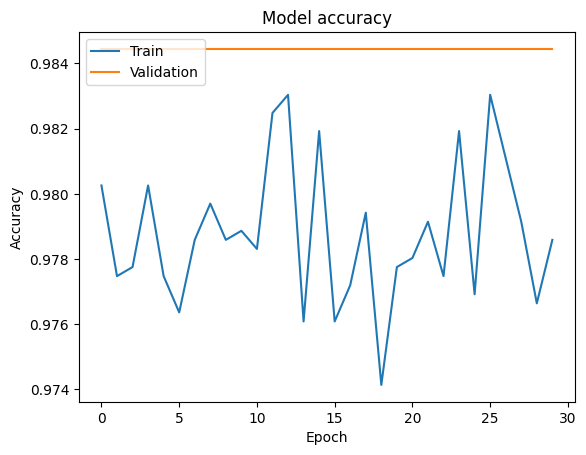

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

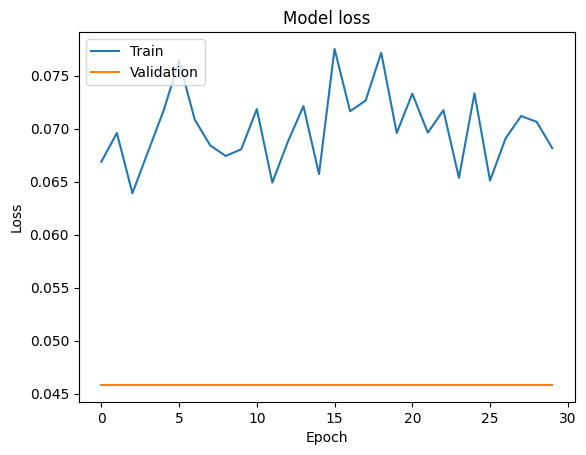

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

36/36 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([7, 0, 3, ..., 2, 8, 4])

In [ ]:
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

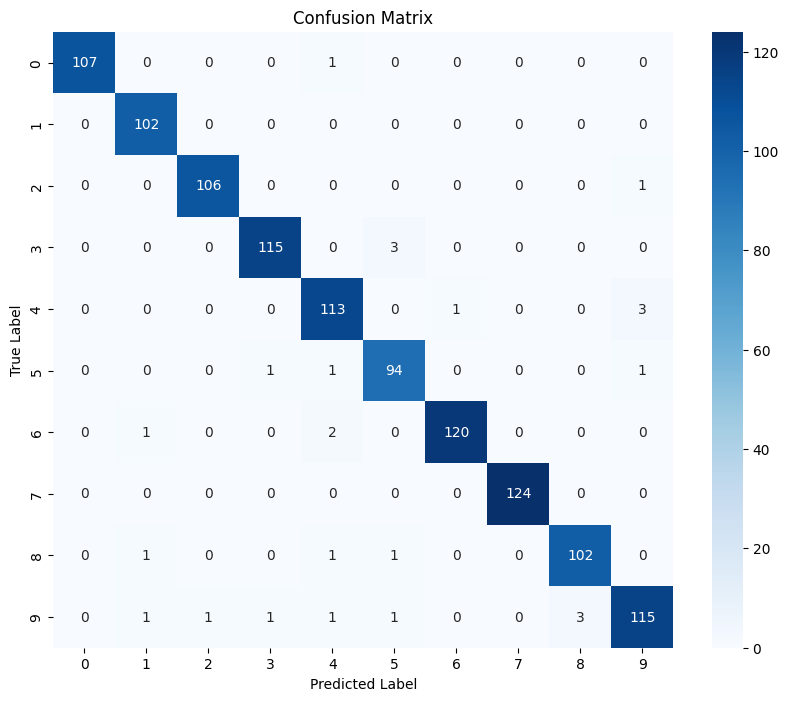

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
report = classification_report(np.argmax(y_test, axis=1), y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       108
           1       0.97      1.00      0.99       102
           2       0.99      0.99      0.99       107
           3       0.98      0.97      0.98       118
           4       0.95      0.97      0.96       117
           5       0.95      0.97      0.96        97
           6       0.99      0.98      0.98       123
           7       1.00      1.00      1.00       124
           8       0.97      0.97      0.97       105
           9       0.96      0.93      0.95       123

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124

